In [68]:
import pandas as pd
import numpy as np


In [69]:
data_ori=pd.read_csv('/Users/mar/data/Proyecto-Shark-Mar-S-nchez-de-Salas/Dataset_proyecto_Sharks/datashark.csv', sep=',', encoding='latin-1')

In [70]:
data= data_ori.copy()  #Para trabajar con una copia y poder comparar si fuera necesario
data

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'''
Lo que puedo hacer es:
    -drop duplicates pero sin pasarse.
    -poner bien todas las columnas.Sustituir espacio por _
    -poner year como int en vez de como float
    -mirar los valores unicos de cada columna y ver si tengo que unificar los valores que sean igual
    -en Species, unificar valores y cambiar nan por "unknown"
    -analisis de nulos y sustutuir por cositas
    -EDA. Ver estadisticas de todo, varianza, correlación. No se pueden borrar columnas.
    -sacar el resultado que sería:
      -especie y numero de ataques, 
      -si es más a mujeres o a hombres
      -por la Activity (si alguna actividad tiene más ataques que otra)"""
      ver si hay dos iguales, con el dato de una se puede llenar la otra date case and year o algo asi 
      for iten in columna 1
        if item es dif al item de la col 1 (con su axis) 
        la hora, % fatales
        
''' pues el item de la dos=al de la uno inplace y ya
https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/


In [71]:
data.info() #uy, hay muchos nulos. Y son casi todo objetos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [72]:
data.shape #no se puede borrar columnas y como mínimo tiene que quedarse con 1500 filas

(25723, 24)

# Arreglar los nombres de columnas. Quitar espacios

In [73]:
columnas=list(data.columns)
columnas_bien= [nombre.replace(' ','') for nombre in columnas]
columnas_bien

['CaseNumber',
 'Date',
 'Year',
 'Type',
 'Country',
 'Area',
 'Location',
 'Activity',
 'Name',
 'Sex',
 'Age',
 'Injury',
 'Fatal(Y/N)',
 'Time',
 'Species',
 'InvestigatororSource',
 'pdf',
 'hrefformula',
 'href',
 'CaseNumber.1',
 'CaseNumber.2',
 'originalorder',
 'Unnamed:22',
 'Unnamed:23']

In [74]:
data.columns=columnas_bien #Ya tiene las columnas bien escritas

# Borrar duplicados

In [93]:
data.duplicated()
data.drop_duplicates(inplace=True)

In [77]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [78]:
data.duplicated().any() #ya no hay duplicados. qué bien. 

False

# Mirar nulos

In [79]:
nan_cols= data.isna().sum()
nan_cols[nan_cols>0]

CaseNumber                 2
Date                      10
Year                      12
Type                      14
Country                   60
Area                     465
Location                 550
Activity                 554
Name                     220
Sex                      575
Age                     2841
Injury                    38
Fatal(Y/N)               549
Time                    3364
Species                 2848
InvestigatororSource      27
pdf                       10
hrefformula               11
href                      10
CaseNumber.1              10
CaseNumber.2              10
originalorder              3
Unnamed:22              6311
Unnamed:23              6310
dtype: int64

In [80]:
diccna=dict(nan_cols)
diccna

{'CaseNumber': 2,
 'Date': 10,
 'Year': 12,
 'Type': 14,
 'Country': 60,
 'Area': 465,
 'Location': 550,
 'Activity': 554,
 'Name': 220,
 'Sex': 575,
 'Age': 2841,
 'Injury': 38,
 'Fatal(Y/N)': 549,
 'Time': 3364,
 'Species': 2848,
 'InvestigatororSource': 27,
 'pdf': 10,
 'hrefformula': 11,
 'href': 10,
 'CaseNumber.1': 10,
 'CaseNumber.2': 10,
 'originalorder': 3,
 'Unnamed:22': 6311,
 'Unnamed:23': 6310}

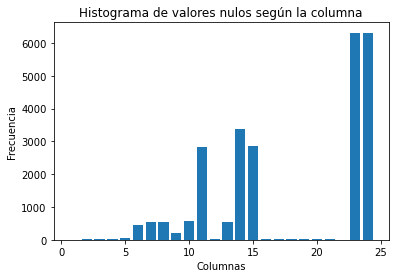

In [81]:
#hacer histograma con columnas y numero de nulos
from matplotlib import pyplot as plt
ejex=[i for i in range(1,25)]
histogram_na = plt.bar(x=ejex, height=diccna.values())
plt.title('Histograma de valores nulos según la columna')
plt.xlabel('Columnas')
plt.ylabel('Frecuencia')
plt.show();


In [15]:
#Borrar las filas con mas de 5 valores nulos

In [31]:
data.shape, data_ori.shape

((6312, 24), (25723, 24))

In [53]:
a=data.isnull().sum(axis=1)

In [57]:
data_a=pd.DataFrame(a)

In [58]:
data_a

,0
0,2
1,3
2,3
3,4
4,4
...,...
6307,22
6308,22
6309,23
8702,24


In [66]:
bad_indices=data_a[data_a[0]>5].index
len(bad_indices)

978

In [82]:
data.drop(bad_indices, axis=0, inplace=True)  #ya hemos eliminado las filas con más de 5 valores nulos. 

In [84]:
data.shape, data_ori.shape

((5334, 24), (25723, 24))

# Unificar columnas necesarias para el estudio.

### Dado que el estudio se va a centrar en relacionar el numero de ataques según la especie, si ha muerto o no la persona y el "motivo" del ataque con el valor 'type', voy a limpiar y analizar las siguientes columnas: Type, Fatal(T/N) y Species.

## Columna Type

In [113]:
data['Type'].unique()

array(['Boating', 'Unprovoked', 'Invalid', 'Provoked', 'Questionable',
       nan, 'Boat', 'Sea Disaster', 'Boatomg'], dtype=object)

In [114]:
data['Type'].replace(['Invalid','Questionable','Boat','Boatomg'],
                    ['Unknown','Unknown','Boating','Boating'],
                    inplace = True)



In [115]:
data['Type'].value_counts()  #ya hemos quitado los valores inconsistentes

Unprovoked      4071
Provoked         519
Unknown          380
Boating          253
Sea Disaster     110
Name: Type, dtype: int64

## Columna Species

In [123]:
len(data['Species'].value_counts())  #hay 1493 valores diferentes que refieren a la especie.


1496

In [125]:
#pd.options.display.max_rows=None

In [142]:
#sustituir nan por "unknown"
data['Species'].fillna('unknown', inplace=True)

<class 'pandas.core.series.Series'>
Int64Index: 5334 entries, 0 to 6301
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
5334 non-null   object
dtypes: object(1)
memory usage: 83.3+ KB


In [143]:
#Lista de especies que encontramos
species_list=['white Shark','tiger shark','bull shark','webbegong shark','blacktip shark','blue shark','whaler shark','mako shark','raggedtooth shark','nurse shark','zambesi shark','hammer head shark','sandtiger shark','basking shark','lemon shark','spinner shark','whitetip shark','angel shark','grey reef shark','galapagos shark','sevengill shark','caribbean reefshark']


In [144]:
#lista de los valores en la columna species
species_values=data['Species'].values.tolist()
len(species_values)


5334

In [150]:
species_col=[]
for i in species_values:
    for j in species_list:
        if j.lower() in i.lower():
            #print(j)
            #print(i)
            species_col.append(j)
            break
    else:
        species_col.append('unknown')
species_col

['white Shark',
 'unknown',
 'unknown',
 'unknown',
 'tiger shark',
 'unknown',
 'tiger shark',
 'lemon shark',
 'bull shark',
 'unknown',
 'grey reef shark',
 'unknown',
 'unknown',
 'unknown',
 'nurse shark',
 'unknown',
 'unknown',
 'unknown',
 'tiger shark',
 'unknown',
 'unknown',
 'unknown',
 'white Shark',
 'tiger shark',
 'white Shark',
 'unknown',
 'bull shark',
 'unknown',
 'unknown',
 'unknown',
 'tiger shark',
 'unknown',
 'bull shark',
 'white Shark',
 'tiger shark',
 'unknown',
 'unknown',
 'unknown',
 'blacktip shark',
 'white Shark',
 'unknown',
 'bull shark',
 'unknown',
 'unknown',
 'galapagos shark',
 'unknown',
 'bull shark',
 'bull shark',
 'grey reef shark',
 'white Shark',
 'unknown',
 'unknown',
 'tiger shark',
 'unknown',
 'nurse shark',
 'nurse shark',
 'tiger shark',
 'tiger shark',
 'white Shark',
 'unknown',
 'unknown',
 'tiger shark',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'unknown',
 'white Shark',
 'unknown',
 'spinner shark',
 'tig

In [ ]:
#sería pseudocodigo ...

'''
for value in data['Species']:
    if value in species_list:
        data['Species'].str.replace(value, )
    if no 
        poner unknown

In [112]:
data['Fatal(Y/N)'].value_counts()

N          3887
Y          1054
UNKNOWN      22
 N            7
M             1
2017          1
Name: Fatal(Y/N), dtype: int64